# Weather Image Recognition

## Objectives

Main objective of this study is to build a deep learning model to recognise weather conditions from a 
given image. Analysis of weather images plays crucial role in many areas for example meteorology, 
agriculture, environmental science and vehicle assistant driving systems. Being able to recognise 
current weather condition automatically from image could produce great benefit in many 
applications.

This study will cover following phases:
* Data
    * Preprocessing
    * Visualization
* Deep Learning methods for image recognition
    * MLP
    * CNN
    * LeNet
* Key Findings

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data

In this project we will analyse Weather Image Dataset. It can be downloaded from Kaggle:
https://www.kaggle.com/datasets/tamimresearch/weather-image-dataset

Data contains 6862 images from 11 different weather conditions:
* dew
* fogsmog
* frost
* glaze
* hail
* lightning
* rain
* rainbow
* rime
* sandstorm
* snow 

### Load images

In [2]:
data_dir = 'dataset'

In [3]:
images_ds = keras.utils.image_dataset_from_directory(data_dir)

Found 6862 files belonging to 11 classes.


In [4]:
labels = np.array([])
for img, label in images_ds:
    labels = np.concatenate([labels,label.numpy()])

In [5]:
class_names = images_ds.class_names
class_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

In [6]:
counts = pd.Series(labels).value_counts().sort_index()
counts.index = class_names
counts

dew           698
fogsmog       851
frost         475
glaze         639
hail          591
lightning     377
rain          526
rainbow       232
rime         1160
sandstorm     692
snow          621
dtype: int64

From the plot below we see the class frequencies of different weather conditions:

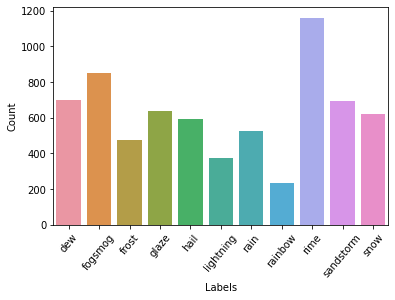

In [7]:
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50);

### Preprocessing

Each image consists of 128x128 pixels from three channels. Before we start modelling, values are
scaled between zero and one.

In [8]:
img_height = 128
img_width = 128
batch_size = 32
seed = 123

In [9]:
img_gen = image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

#### Train and validation datasets

80% of the data is used for training and 20% for validation. The training set includes 5493 images and the test set 1369.

In [10]:
train_ds = img_gen.flow_from_directory(
    directory = data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed,
    subset='training',
    shuffle=True
)

Found 5493 images belonging to 11 classes.


In [11]:
validation_ds = img_gen.flow_from_directory(
    directory = data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed,
    subset='validation',
    shuffle=True
)

Found 1369 images belonging to 11 classes.


In [12]:
train_images, train_labels = train_ds[0]

print(train_images.shape)
print(train_labels.shape)

(32, 128, 128, 3)
(32, 11)


In [13]:
num_classes = train_labels.shape[1]
print(num_classes)

11


In [14]:
label_names = list(train_ds.class_indices.keys())
label_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

### Visualizing images

Below plot shows ten sample images from dataset.

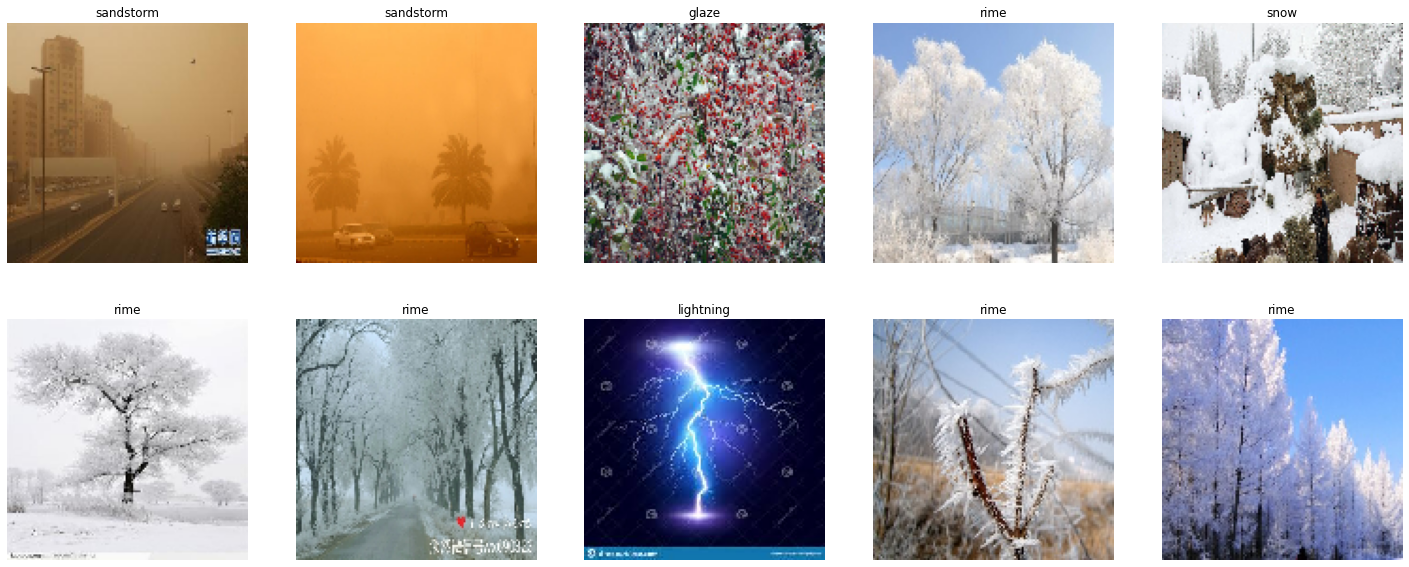

In [15]:
plt.figure(figsize=(25, 10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])
    index = train_labels[i].argmax()
    plt.title(label_names[index])
    plt.axis("off")

## Deep Learning methods for image recognition

### MLP - Multi-Layer Perceptron

First, we build "vanilla" neural network with three hidden layers:

1. dense layer with 128 nodes, activation ReLU
2. dense layer with 128 nodes, activation ReLU
3. dense layer with 11 nodes, activation Softmax

In [16]:
model_2 = Sequential()

model_2.add(Reshape((img_height*img_width*3,), input_shape=train_images[0].shape))
model_2.add(Dense(128))
model_2.add(Activation('relu'))
model_2.add(Dense(128))
model_2.add(Activation('relu'))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 11)                1419      
                                                                 
 activation_2 (Activation)   (None, 11)                0

In [17]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)

model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_2 = model_2.fit(train_ds,
    batch_size=batch_size,
    epochs=10,
    validation_data=validation_ds,
    shuffle=True)

Epoch 1/10
172/172 [==============================] - 66s 376ms/step - loss: 7.0459 - accuracy: 0.2130 - val_loss: 2.1835 - val_accuracy: 0.2966
Epoch 2/10
172/172 [==============================] - 61s 358ms/step - loss: 2.1325 - accuracy: 0.3098 - val_loss: 2.0984 - val_accuracy: 0.3199
Epoch 3/10
172/172 [==============================] - 55s 319ms/step - loss: 1.9764 - accuracy: 0.3468 - val_loss: 1.9274 - val_accuracy: 0.3791
Epoch 4/10
172/172 [==============================] - 53s 306ms/step - loss: 1.9372 - accuracy: 0.3730 - val_loss: 1.9144 - val_accuracy: 0.3389
Epoch 5/10
172/172 [==============================] - 53s 309ms/step - loss: 1.8823 - accuracy: 0.3696 - val_loss: 1.8689 - val_accuracy: 0.3806
Epoch 6/10
172/172 [==============================] - 56s 322ms/step - loss: 1.8665 - accuracy: 0.3790 - val_loss: 1.8793 - val_accuracy: 0.3455
Epoch 7/10
172/172 [==============================] - 57s 334ms/step - loss: 1.8231 - accuracy: 0.3832 - val_loss: 1.8934 - val_ac

After 10 epochs we achieved 
* Training accuracy of 41%
* Validation accuracy of 38%

Figure below shows how training and validation loss and accuracy evolved during iterations:

In [18]:
def display_metrics(history):

    n = len(history.history["loss"])

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(range(n), (history.history["loss"]),'r', label="Train Loss")
    ax.plot(range(n), (history.history["val_loss"]),'b', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss over iterations')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(range(n), (history.history["accuracy"]),'r', label="Train Accuracy")
    ax.plot(range(n), (history.history["val_accuracy"]),'b', label="Validation Accuracy")
    ax.legend(loc='lower right')
    ax.set_title('Accuracy over iterations')

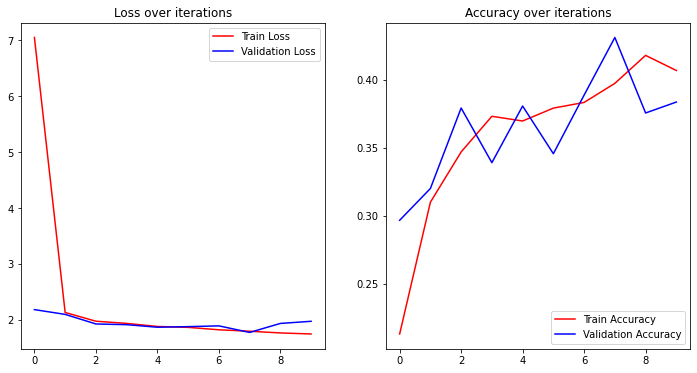

In [19]:
display_metrics(history_2)

#### Predict

Create test data with Suffle = False.

In [20]:
test_ds = img_gen.flow_from_directory(
    directory = data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed,
    subset='validation',
    shuffle=False
)

Found 1369 images belonging to 11 classes.


Predict class

In [21]:
pred_2 = model_2.predict(test_ds)
pred_2 = pred_2.argmax(axis=1)
pred_2

43/43 [==============================] - 9s 207ms/step


array([0, 0, 0, ..., 6, 6, 4], dtype=int64)

Confusion matrix

In [22]:
cf_2 = confusion_matrix(test_ds.classes, pred_2)
cf_2

array([[96,  1, 14,  0,  6,  1, 11,  0,  6,  3,  1],
       [ 0, 89, 26,  6,  7,  0, 23,  0,  8, 11,  0],
       [12,  8, 23,  0, 13,  0, 22,  0,  7,  3,  7],
       [ 3, 23, 27,  4, 21,  0, 32,  0,  3, 10,  4],
       [ 5,  2, 16,  1, 55,  0, 34,  0,  4,  1,  0],
       [ 0,  6,  4,  0, 18, 12,  6,  0, 28,  1,  0],
       [ 2,  5,  7,  0, 17,  1, 71,  0,  1,  0,  1],
       [ 1,  5,  5,  1,  5,  2,  4,  0, 19,  2,  2],
       [ 0, 12, 11,  5,  6,  2, 78,  0, 89,  5, 24],
       [ 2, 28, 19,  0,  3,  0,  7,  0,  2, 77,  0],
       [ 1,  6, 13,  1,  7,  0, 82,  0,  4,  1,  9]], dtype=int64)

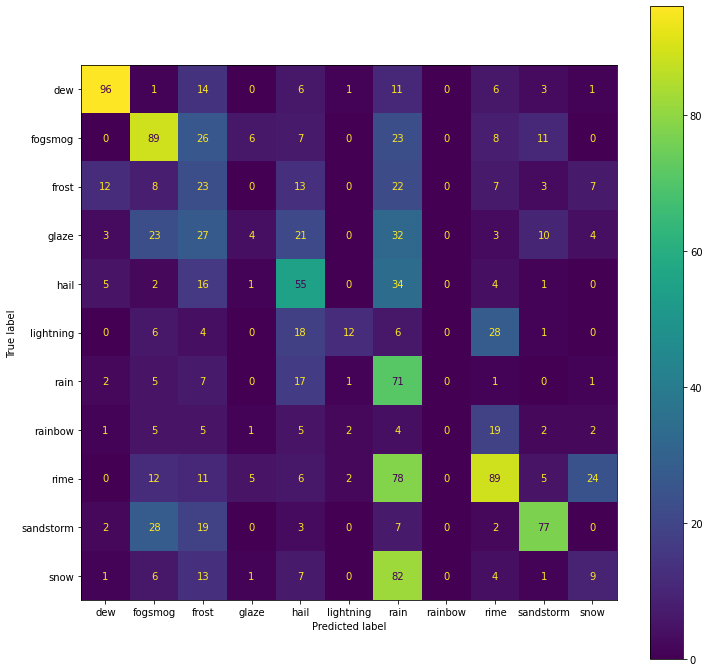

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_2, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()

We see that the model cannot detect any "rainbows" and only few "glaze" instead it predicts lot of the images to be "rain".

### CNN

Next, we will build following Convolutional Neural Network model:

1. 5x5 convolution with 2x2 stride and 32 filters
2. Another 5x5 convolution with 2x2 stride and 32 filters
3. 2x2 max pooling
4. Dropout 25%
4. Flatten
5. Dense layer with 128 nodes, activation ReLU
6. Dense layer with 11 nodes, activation Softmax

In [24]:
model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=train_images[0].shape))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
            
model_1.add(Dense(128))
model_1.add(Activation('relu'))
            
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 activation_3 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        25632     
                                                                 
 activation_4 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [25]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)

model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_1 = model_1.fit(train_ds,
    batch_size=batch_size,
    epochs=10,
    validation_data=validation_ds,
    shuffle=True)

Epoch 1/10
172/172 [==============================] - 82s 469ms/step - loss: 1.7084 - accuracy: 0.4326 - val_loss: 1.3794 - val_accuracy: 0.5332
Epoch 2/10
172/172 [==============================] - 77s 450ms/step - loss: 1.2506 - accuracy: 0.5909 - val_loss: 1.1567 - val_accuracy: 0.6121
Epoch 3/10
172/172 [==============================] - 80s 462ms/step - loss: 1.0575 - accuracy: 0.6492 - val_loss: 1.0428 - val_accuracy: 0.6684
Epoch 4/10
172/172 [==============================] - 83s 484ms/step - loss: 0.9114 - accuracy: 0.6987 - val_loss: 1.1309 - val_accuracy: 0.6472
Epoch 5/10
172/172 [==============================] - 69s 400ms/step - loss: 0.7484 - accuracy: 0.7497 - val_loss: 1.0888 - val_accuracy: 0.6808
Epoch 6/10
172/172 [==============================] - 55s 321ms/step - loss: 0.6290 - accuracy: 0.7877 - val_loss: 1.2012 - val_accuracy: 0.6450
Epoch 7/10
172/172 [==============================] - 51s 298ms/step - loss: 0.4910 - accuracy: 0.8371 - val_loss: 1.1700 - val_ac

After 10 epochs we achieved 
* Training accuracy of 91%
* Validation accuracy of 65%

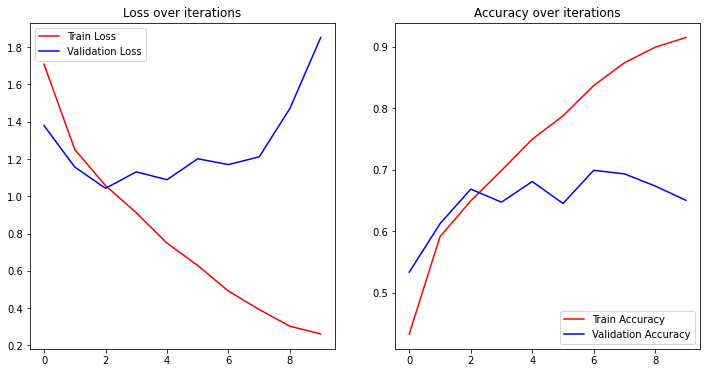

In [26]:
display_metrics(history_1)

#### Predict

In [27]:
pred_1 = model_1.predict(test_ds)
pred_1 = pred_1.argmax(axis=1)
pred_1

43/43 [==============================] - 6s 146ms/step


array([ 0,  0,  0, ..., 10,  8,  3], dtype=int64)

In [28]:
cf_1 = confusion_matrix(test_ds.classes, pred_1)
cf_1

array([[104,   2,   3,   0,   4,   9,  10,   1,   1,   2,   3],
       [  0, 146,   0,   0,   0,   7,   4,   0,   1,   9,   3],
       [  5,   1,  44,   9,   4,   3,  14,   0,   1,   2,  12],
       [  1,   0,  17,  67,   1,   0,  17,   0,   3,   1,  20],
       [  4,   4,  17,   7,  51,   5,  18,   0,   2,   1,   9],
       [  0,   1,   0,   0,   0,  70,   1,   1,   0,   2,   0],
       [  2,   5,   4,   2,   0,   5,  72,   1,   1,   1,  12],
       [  1,   5,   0,   0,   0,   9,   3,  20,   2,   6,   0],
       [  0,   7,  16,   7,   2,   7,   8,   0, 131,   0,  54],
       [  0,  20,   0,   0,   0,   1,   3,   3,   0, 111,   0],
       [  2,   3,   7,  13,   4,   1,  12,   0,   8,   0,  74]],
      dtype=int64)

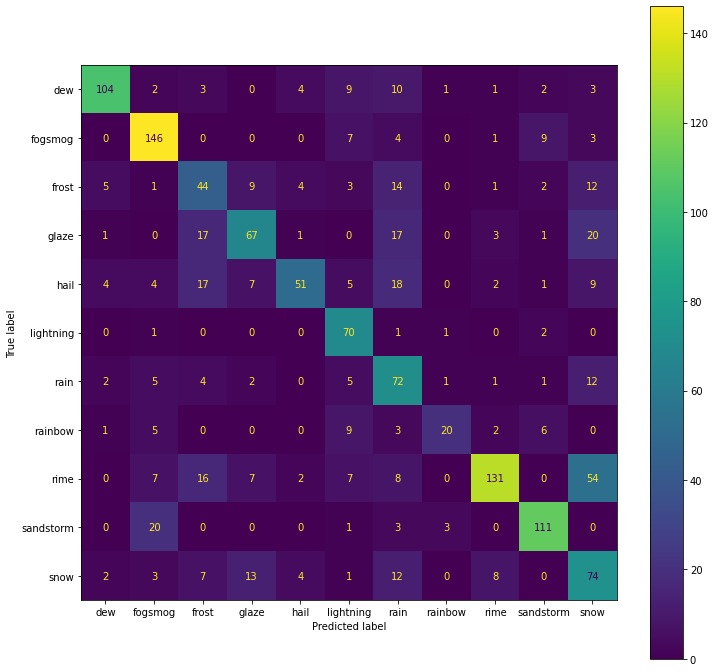

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_1, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()

We see that CNN works much better than MLP. However, some classes like "rain" and "snow" gets confused to other weather classes quite much.

### LeNet-5

Finally, we will try traditional LeNet architecture for CNN:

1. 5x5 convolution with 6 filters
2. Average pooling
3. 5x5 convolution with 16 filters
4. Average pooling
5. Flatten
6. Dense layer with 120 nodes, activation ReLU
7. Dense layer with 84 nodes, activation ReLU
8. Dense layer with 11 nodes, activation Softmax

In [30]:
model_3 = Sequential()

model_3.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=train_images[0].shape))
model_3.add(layers.AveragePooling2D())

model_3.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_3.add(layers.AveragePooling2D())

model_3.add(layers.Flatten())

model_3.add(layers.Dense(units=120, activation='relu'))

model_3.add(layers.Dense(units=84, activation='relu'))

model_3.add(layers.Dense(units=num_classes, activation = 'softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 13456)             0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [31]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)

model_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_3 = model_3.fit(train_ds,
    batch_size=batch_size,
    epochs=10,
    validation_data=validation_ds,
    shuffle=True)

Epoch 1/10
172/172 [==============================] - 66s 375ms/step - loss: 1.7692 - accuracy: 0.4011 - val_loss: 1.3408 - val_accuracy: 0.5362
Epoch 2/10
172/172 [==============================] - 64s 371ms/step - loss: 1.3103 - accuracy: 0.5649 - val_loss: 1.3204 - val_accuracy: 0.5654
Epoch 3/10
172/172 [==============================] - 63s 367ms/step - loss: 1.1138 - accuracy: 0.6313 - val_loss: 1.1341 - val_accuracy: 0.6260
Epoch 4/10
172/172 [==============================] - 63s 365ms/step - loss: 0.9790 - accuracy: 0.6752 - val_loss: 1.1121 - val_accuracy: 0.6297
Epoch 5/10
172/172 [==============================] - 60s 350ms/step - loss: 0.8779 - accuracy: 0.7104 - val_loss: 1.2593 - val_accuracy: 0.5975
Epoch 6/10
172/172 [==============================] - 60s 351ms/step - loss: 0.7183 - accuracy: 0.7593 - val_loss: 1.2569 - val_accuracy: 0.6129
Epoch 7/10
172/172 [==============================] - 63s 366ms/step - loss: 0.6235 - accuracy: 0.7994 - val_loss: 1.4452 - val_ac

After 10 epochs we achieved 
* Training accuracy of 89%
* Validation accuracy of 64%


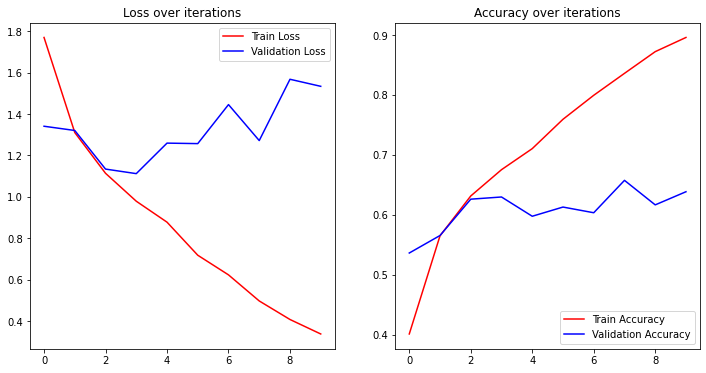

In [32]:
display_metrics(history_3)

#### Predict

In [33]:
pred_3 = model_3.predict(test_ds)
pred_3 = pred_3.argmax(axis=1)
pred_3

43/43 [==============================] - 9s 197ms/step


array([ 0,  6,  0, ..., 10, 10,  8], dtype=int64)

In [34]:
cf_3 = confusion_matrix(test_ds.classes, pred_3)
cf_3

array([[ 85,   1,  10,   1,  13,   5,   6,   6,   3,   8,   1],
       [  0, 147,   0,   1,   4,   1,   1,   0,   8,   5,   3],
       [  1,   0,  36,   5,  16,   1,   5,   3,  19,   2,   7],
       [  0,   2,  16,  47,  19,   0,  11,   1,  19,   0,  12],
       [  3,   4,   2,   1,  77,   0,   8,   3,  12,   0,   8],
       [  0,   4,   0,   0,   1,  50,   1,  11,   2,   6,   0],
       [  2,   5,   3,   1,   8,   2,  53,   1,   9,   0,  21],
       [  2,   3,   0,   0,   0,   2,   2,  32,   1,   4,   0],
       [  1,   5,   6,   6,   4,   2,   2,  11, 176,   1,  18],
       [  0,  19,   1,   0,   0,   2,   2,   2,   4, 107,   1],
       [  2,   1,   3,   4,   7,   0,   4,   2,  36,   1,  64]],
      dtype=int64)

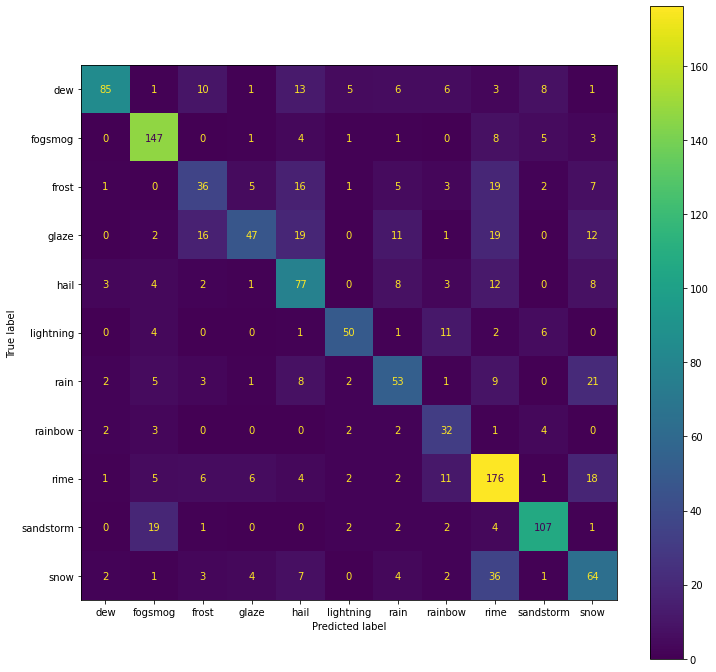

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_3, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()

We see that LeNet works quite similarly compared to CNN model introduced in previous chapter.

## Key findings

When comparing accuracy of the models used, it seems like CNN model works much better than vanilla neural network. Accuracy of the famouns LeNet architecture is quite similar compared to custom CNN architecture that was implemented from scratch. With CNN we could achieved validation accuracy of 66%. However, model has difficulties to separate similar weather types like "snowing", "raining", "rime" and "hailing".